In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import fastf1 as f1
from ing_theme_matplotlib import mpl_style
import mplcyberpunk
from fastf1 import plotting

In [2]:
f1.Cache.enable_cache("../cache")

In [3]:
quali = f1.get_session(2024, "Las Vegas", "Qualifying")
quali.load()

core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INF

In [4]:
quali.session_info

{'Meeting': {'Key': 1250,
  'Name': 'Las Vegas Grand Prix',
  'OfficialName': 'FORMULA 1 HEINEKEN SILVER LAS VEGAS GRAND PRIX 2024',
  'Location': 'Las Vegas',
  'Number': 22,
  'Country': {'Key': 19, 'Code': 'USA', 'Name': 'United States'},
  'Circuit': {'Key': 152, 'ShortName': 'Las Vegas'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9640,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2024, 11, 22, 22, 0),
 'EndDate': datetime.datetime(2024, 11, 22, 23, 0),
 'GmtOffset': datetime.timedelta(days=-1, seconds=57600),
 'Path': '2024/2024-11-23_Las_Vegas_Grand_Prix/2024-11-22_Qualifying/'}

In [5]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
63,RUS,Mercedes,NaN,1.0,NaT,
55,SAI,Ferrari,NaN,2.0,NaT,
10,GAS,Alpine,NaN,3.0,NaT,
16,LEC,Ferrari,NaN,4.0,NaT,
1,VER,Red Bull Racing,NaN,5.0,NaT,
4,NOR,McLaren,NaN,6.0,NaT,
22,TSU,RB,NaN,7.0,NaT,
81,PIA,McLaren,NaN,8.0,NaT,
27,HUL,Haas F1 Team,NaN,9.0,NaT,
44,HAM,Mercedes,NaN,10.0,NaT,


In [6]:
quali.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:15:35.063000,RUS,63,NaT,1.0,1.0,0 days 00:13:32.787000,0 days 00:15:32.011000,NaT,0 days 00:00:41.360000,...,True,Mercedes,0 days 00:13:32.787000,2024-11-23 06:00:03.153,1,NaN,False,,False,False
1,0 days 00:18:57.735000,RUS,63,NaT,2.0,2.0,0 days 00:17:07.922000,NaT,NaT,0 days 00:00:37.296000,...,True,Mercedes,0 days 00:15:35.063000,2024-11-23 06:02:05.429,1,NaN,False,,False,False
2,0 days 00:20:32.080000,RUS,63,0 days 00:01:34.345000,3.0,2.0,NaT,NaT,0 days 00:00:26.817000,0 days 00:00:31.499000,...,True,Mercedes,0 days 00:18:57.735000,2024-11-23 06:05:28.101,1,NaN,False,,False,True
3,0 days 00:22:37.762000,RUS,63,0 days 00:02:05.682000,4.0,2.0,NaT,NaT,0 days 00:00:41.304000,0 days 00:00:43.891000,...,True,Mercedes,0 days 00:20:32.080000,2024-11-23 06:07:02.446,1,NaN,False,,False,True
4,0 days 00:24:32.246000,RUS,63,0 days 00:01:54.484000,5.0,2.0,NaT,NaT,0 days 00:00:32.893000,0 days 00:00:41.018000,...,True,Mercedes,0 days 00:22:37.762000,2024-11-23 06:09:08.128,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0 days 00:32:24.987000,BOT,77,0 days 00:01:34.558000,9.0,2.0,NaT,NaT,0 days 00:00:26.648000,0 days 00:00:31.774000,...,True,Kick Sauber,0 days 00:30:50.429000,2024-11-23 06:17:20.795,12,NaN,False,,False,True
343,0 days 00:34:22.375000,BOT,77,0 days 00:01:57.388000,10.0,2.0,NaT,0 days 00:34:19.483000,0 days 00:00:33.840000,0 days 00:00:37.911000,...,True,Kick Sauber,0 days 00:32:24.987000,2024-11-23 06:18:55.353,1,NaN,False,,False,False
344,0 days 00:31:09.086000,STR,18,NaT,1.0,1.0,0 days 00:28:56.213000,NaT,NaT,0 days 00:00:35.677000,...,True,Aston Martin,0 days 00:28:56.213000,2024-11-23 06:15:26.579,12,NaN,False,,False,False
345,0 days 00:32:43.570000,STR,18,0 days 00:01:34.484000,2.0,1.0,NaT,NaT,0 days 00:00:26.834000,0 days 00:00:31.446000,...,True,Aston Martin,0 days 00:31:09.086000,2024-11-23 06:17:39.452,1,NaN,False,,False,True


In [7]:
rus = quali.get_driver("RUS")
rus

DriverNumber                                                         63
BroadcastName                                                 G RUSSELL
Abbreviation                                                        RUS
DriverId                                                        russell
TeamName                                                       Mercedes
TeamColor                                                        27F4D2
TeamId                                                         mercedes
FirstName                                                        George
LastName                                                        Russell
FullName                                                 George Russell
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         GBR
Position                                                            1.0
ClassifiedPosition                                              

In [8]:
rus_laps = quali.laps.pick_driver("RUS")
rus_lap_time = rus_laps["LapTime"]
rus_sec1 = rus_laps["Sector1Time"]
rus_sec2 = rus_laps["Sector2Time"]
rus_sec3 = rus_laps["Sector3Time"]
rus_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:41.360000,0 days 00:00:47.547000,140.0,186.0,NaN,210.0
1,NaT,NaT,0 days 00:00:37.296000,0 days 00:00:43.971000,165.0,202.0,320.0,258.0
2,0 days 00:01:34.345000,0 days 00:00:26.817000,0 days 00:00:31.499000,0 days 00:00:36.029000,184.0,214.0,320.0,341.0
3,0 days 00:02:05.682000,0 days 00:00:41.304000,0 days 00:00:43.891000,0 days 00:00:40.487000,124.0,164.0,305.0,256.0
4,0 days 00:01:54.484000,0 days 00:00:32.893000,0 days 00:00:41.018000,0 days 00:00:40.573000,150.0,101.0,319.0,283.0
5,0 days 00:01:33.363000,0 days 00:00:26.232000,0 days 00:00:31.273000,0 days 00:00:35.858000,187.0,213.0,322.0,342.0
6,0 days 00:02:07.935000,0 days 00:00:42.002000,0 days 00:00:40.745000,0 days 00:00:45.188000,118.0,162.0,248.0,248.0
7,0 days 00:01:51.797000,0 days 00:00:36.617000,0 days 00:00:36.830000,0 days 00:00:38.350000,163.0,205.0,318.0,273.0
8,0 days 00:01:33.186000,0 days 00:00:26.192000,0 days 00:00:31.155000,0 days 00:00:35.839000,188.0,213.0,321.0,342.0
9,0 days 00:01:56.333000,0 days 00:00:33.095000,0 days 00:00:37.282000,0 days 00:00:45.956000,148.0,187.0,NaN,234.0


In [9]:
fastest_rus = rus_laps.pick_fastest()
tele_rus = fastest_rus.get_telemetry().add_distance()
tele_rus.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,325,8,11578
3,325,8,11585
4,325,8,11595
5,325,8,11605
6,325,8,11615
...,...,...,...
720,323,8,11513
721,322,8,11511
722,322,8,11509
723,322,8,11521


In [10]:
sai = quali.get_driver("SAI")
sai

DriverNumber                                                         55
BroadcastName                                                   C SAINZ
Abbreviation                                                        SAI
DriverId                                                          sainz
TeamName                                                        Ferrari
TeamColor                                                        E80020
TeamId                                                          ferrari
FirstName                                                        Carlos
LastName                                                          Sainz
FullName                                                   Carlos Sainz
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         ESP
Position                                                            2.0
ClassifiedPosition                                              

In [11]:
sai_laps = quali.laps.pick_driver("SAI")
sai_lap_time = sai_laps["LapTime"]
sai_sec1 = sai_laps["Sector1Time"]
sai_sec2 = sai_laps["Sector2Time"]
sai_sec3 = sai_laps["Sector3Time"]
sai_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
25,NaT,NaT,0 days 00:00:36.230000,0 days 00:00:38.777000,154.0,202.0,321.0,280.0
26,0 days 00:01:35.979000,0 days 00:00:27.692000,0 days 00:00:32.101000,0 days 00:00:36.186000,179.0,209.0,322.0,336.0
27,0 days 00:02:08.662000,0 days 00:00:42.853000,0 days 00:00:39.335000,0 days 00:00:46.474000,140.0,187.0,319.0,302.0
28,0 days 00:01:33.484000,0 days 00:00:26.395000,0 days 00:00:31.386000,0 days 00:00:35.703000,186.0,215.0,323.0,343.0
29,0 days 00:02:16.404000,0 days 00:00:35.499000,0 days 00:00:41.855000,0 days 00:00:59.050000,131.0,160.0,NaN,158.0
30,0 days 00:02:13.658000,0 days 00:00:58.514000,0 days 00:00:36.039000,0 days 00:00:39.105000,155.0,191.0,319.0,287.0
31,0 days 00:01:33.537000,0 days 00:00:26.423000,0 days 00:00:31.206000,0 days 00:00:35.908000,187.0,214.0,323.0,342.0
32,0 days 00:02:05.737000,0 days 00:00:36.751000,0 days 00:00:40.211000,0 days 00:00:48.775000,143.0,167.0,NaN,241.0
33,NaT,NaT,0 days 00:00:34.019000,0 days 00:00:40.612000,173.0,206.0,321.0,289.0
34,0 days 00:01:40.169000,0 days 00:00:26.655000,0 days 00:00:31.473000,0 days 00:00:42.041000,187.0,214.0,NaN,341.0


In [12]:
fastest_sai = sai_laps.pick_fastest()
tele_sai = fastest_sai.get_telemetry().add_distance()
tele_sai.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,326,8,11626
3,327,8,11632
4,328,8,11644
5,327,8,11667
6,327,8,11690
...,...,...,...
712,328,8,11659
713,327,8,11599
714,327,8,11540
715,328,8,11597


In [13]:
gas = quali.get_driver("GAS")
gas

DriverNumber                                                         10
BroadcastName                                                   P GASLY
Abbreviation                                                        GAS
DriverId                                                          gasly
TeamName                                                         Alpine
TeamColor                                                        0093cc
TeamId                                                           alpine
FirstName                                                        Pierre
LastName                                                          Gasly
FullName                                                   Pierre Gasly
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         FRA
Position                                                            3.0
ClassifiedPosition                                              

In [14]:
gas_laps = quali.laps.pick_driver("GAS")
gas_lap_time = gas_laps["LapTime"]
gas_sec1 = gas_laps["Sector1Time"]
gas_sec2 = gas_laps["Sector2Time"]
gas_sec3 = gas_laps["Sector3Time"]
gas_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
49,NaT,NaT,0 days 00:00:37.927000,0 days 00:00:39.140000,161.0,182.0,317.0,278.0
50,0 days 00:01:43.773000,0 days 00:00:30.399000,0 days 00:00:34.233000,0 days 00:00:39.141000,NaN,190.0,320.0,298.0
51,0 days 00:01:34.509000,0 days 00:00:26.944000,0 days 00:00:31.617000,0 days 00:00:35.948000,184.0,213.0,324.0,344.0
52,0 days 00:02:08.496000,0 days 00:00:36.842000,0 days 00:00:40.925000,0 days 00:00:50.729000,87.0,168.0,NaN,236.0
53,NaT,NaT,0 days 00:00:35.240000,0 days 00:00:38.001000,158.0,189.0,324.0,281.0
54,0 days 00:01:44.502000,0 days 00:00:30.185000,0 days 00:00:35.294000,0 days 00:00:39.023000,148.0,191.0,320.0,294.0
55,0 days 00:01:33.844000,0 days 00:00:26.542000,0 days 00:00:31.317000,0 days 00:00:35.985000,185.0,212.0,321.0,347.0
56,0 days 00:02:05.012000,0 days 00:00:44.441000,0 days 00:00:36.839000,0 days 00:00:43.732000,151.0,185.0,320.0,222.0
57,0 days 00:01:33.691000,0 days 00:00:26.556000,0 days 00:00:31.381000,0 days 00:00:35.754000,186.0,213.0,323.0,351.0
58,0 days 00:02:12.625000,0 days 00:00:35.720000,0 days 00:00:40.440000,0 days 00:00:56.465000,116.0,169.0,NaN,169.0


In [15]:
fastest_gas = gas_laps.pick_fastest()
tele_gas = fastest_gas.get_telemetry().add_distance()
tele_gas.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,327,8,11726
3,328,8,11744
4,329,8,11779
5,330,8,11805
6,331,8,11831
...,...,...,...
713,328,8,11747
714,328,8,11729
715,328,8,11711
716,328,8,11718


In [16]:
ver = quali.get_driver("VER")
ver

DriverNumber                                                          1
BroadcastName                                              M VERSTAPPEN
Abbreviation                                                        VER
DriverId                                                 max_verstappen
TeamName                                                Red Bull Racing
TeamColor                                                        3671C6
TeamId                                                         red_bull
FirstName                                                           Max
LastName                                                     Verstappen
FullName                                                 Max Verstappen
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         NED
Position                                                            5.0
ClassifiedPosition                                              

In [17]:
ver_laps = quali.laps.pick_driver("VER")
ver_lap_time = ver_laps["LapTime"]
ver_sec1 = ver_laps["Sector1Time"]
ver_sec2 = ver_laps["Sector2Time"]
ver_sec3 = ver_laps["Sector3Time"]
ver_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
97,NaT,NaT,0 days 00:00:36.566000,0 days 00:00:41.521000,166.0,114.0,301.0,265.0
98,0 days 00:01:47.053000,0 days 00:00:29.327000,0 days 00:00:34.076000,0 days 00:00:43.650000,158.0,203.0,320.0,182.0
99,0 days 00:01:34.353000,0 days 00:00:26.740000,0 days 00:00:31.395000,0 days 00:00:36.218000,185.0,213.0,320.0,340.0
100,0 days 00:01:59.004000,0 days 00:00:38.318000,0 days 00:00:40.662000,0 days 00:00:40.024000,125.0,194.0,319.0,257.0
101,0 days 00:01:33.800000,0 days 00:00:26.541000,0 days 00:00:31.183000,0 days 00:00:36.076000,187.0,214.0,321.0,343.0
102,0 days 00:01:54.549000,0 days 00:00:37.324000,0 days 00:00:38.724000,0 days 00:00:38.501000,138.0,198.0,319.0,281.0
103,0 days 00:01:33.299000,0 days 00:00:26.413000,0 days 00:00:31.165000,0 days 00:00:35.721000,188.0,212.0,323.0,348.0
104,0 days 00:01:56.393000,0 days 00:00:33.297000,0 days 00:00:33.852000,0 days 00:00:49.244000,171.0,207.0,NaN,249.0
105,NaT,NaT,0 days 00:00:33.820000,0 days 00:00:39.454000,171.0,203.0,294.0,288.0
106,0 days 00:01:39.663000,0 days 00:00:28.205000,0 days 00:00:33.194000,0 days 00:00:38.264000,177.0,204.0,321.0,299.0


In [18]:
fastest_ver = ver_laps.pick_fastest()
tele_ver = fastest_ver.get_telemetry().add_distance()
tele_ver.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,325,8,11573
3,325,8,11572
4,325,8,11570
5,326,8,11548
6,327,8,11526
...,...,...,...
724,324,8,11497
725,324,8,11520
726,324,8,11543
727,324,8,11554


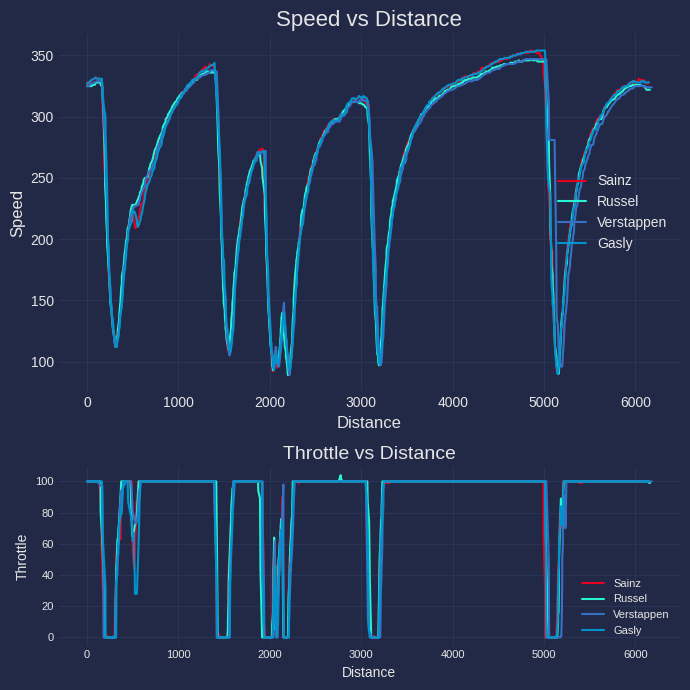

In [20]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_sai.Distance, tele_sai.Speed, label="Sainz", color=get_driver_color("SAI")
)
ax[0].plot(
    tele_rus.Distance, tele_rus.Speed, label="Russel", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_ver.Distance, tele_ver.Speed, label="Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_gas.Distance, tele_gas.Speed, label="Gasly", color=get_driver_color("GAS")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_sai.Distance, tele_sai.Throttle, label="Sainz", color=get_driver_color("SAI")
)
ax[1].plot(
    tele_rus.Distance, tele_rus.Throttle, label="Russel", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_ver.Distance, tele_ver.Throttle, label="Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_gas.Distance, tele_gas.Throttle, label="Gasly", color=get_driver_color("GAS")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [21]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

In [22]:
driver1_sectors = pd.DataFrame(
    {
        "Driver": ["Sainz"] * len(sai_sec1),
        "Sector1Time": sai_sec1,
        "Sector2Time": sai_sec2,
        "Sector3Time": sai_sec3,
        "Lap Time": sai_lap_time,
    }
)

driver2_sectors = pd.DataFrame(
    {
        "Driver": ["Russel"] * len(rus_sec1),
        "Sector1Time": rus_sec1,
        "Sector2Time": rus_sec2,
        "Sector3Time": rus_sec3,
        "Lap Time": rus_lap_time,
    }
)

driver3_sectors = pd.DataFrame(
    {
        "Driver": ["Verstappen"] * len(ver_sec1),
        "Sector1Time": ver_sec1,
        "Sector2Time": ver_sec2,
        "Sector3Time": ver_sec3,
        "Lap Time": ver_lap_time,
    }
)

driver4_sectors = pd.DataFrame(
    {
        "Driver": ["Gasly"] * len(gas_sec1),
        "Sector1Time": gas_sec1,
        "Sector2Time": gas_sec2,
        "Sector3Time": gas_sec3,
        "Lap Time": gas_lap_time,
    }
)

all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors,driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors["Sector1Time"] = all_drivers_sectors["Sector1Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Sector2Time"] = all_drivers_sectors["Sector2Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Sector3Time"] = all_drivers_sectors["Sector3Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Lap Time"] = all_drivers_sectors["Lap Time"].apply(
    convert_to_normal
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Sainz,00:27.692000,00:32.101000,00:36.186000,01:35.979000
2,Sainz,00:42.853000,00:39.335000,00:46.474000,02:08.662000
3,Sainz,00:26.395000,00:31.386000,00:35.703000,01:33.484000
4,Sainz,00:35.499000,00:41.855000,00:59.050000,02:16.404000
5,Sainz,00:58.514000,00:36.039000,00:39.105000,02:13.658000
...,...,...,...,...,...
89,Gasly,00:26.611000,00:31.252000,00:35.762000,01:33.625000
90,Gasly,00:33.204000,00:34.895000,00:45.179000,01:53.278000
92,Gasly,00:30.177000,00:36.815000,00:41.447000,01:48.439000
93,Gasly,00:26.222000,00:30.928000,00:35.514000,01:32.664000


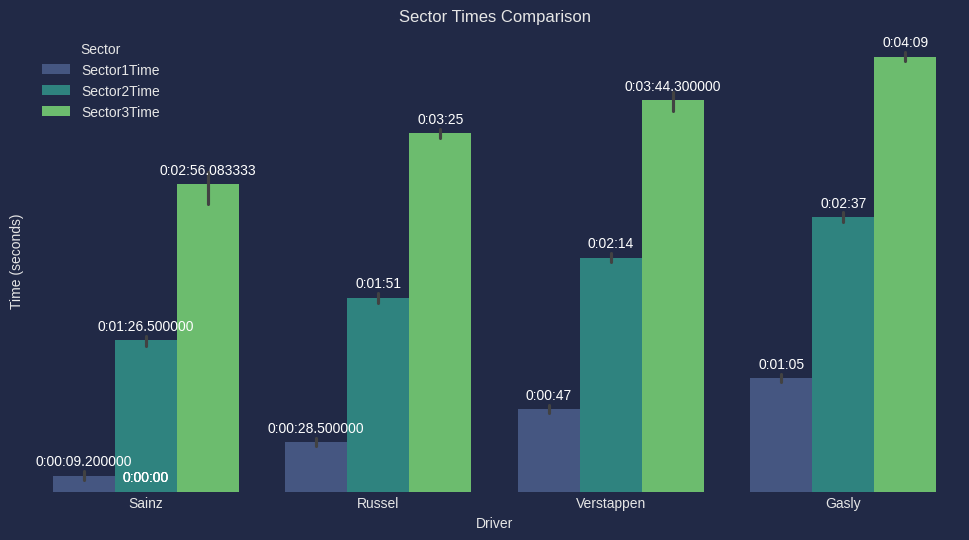

In [23]:
from datetime import timedelta

melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=melted_data, x="Driver", y="Time", hue="Sector", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(
        f"{timedelta(seconds=height)}", 
        (p.get_x() + p.get_width() / 2.0, height),
        ha="center",
        va="bottom",
        fontsize=10,
        color="white",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Driver")
plt.gca().set_yticks([])
plt.gca().invert_yaxis()
plt.show()

*Race*

In [24]:
race = f1.get_session(2024, "Las Vegas", "R")
race.load()

core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No 

In [25]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
63,RUS,Mercedes,1.0,1.0,0 days 01:22:05.969000,Finished
44,HAM,Mercedes,10.0,2.0,0 days 00:00:07.313000,Finished
55,SAI,Ferrari,2.0,3.0,0 days 00:00:11.906000,Finished
16,LEC,Ferrari,4.0,4.0,0 days 00:00:14.283000,Finished
1,VER,Red Bull Racing,5.0,5.0,0 days 00:00:16.582000,Finished
4,NOR,McLaren,6.0,6.0,0 days 00:00:43.385000,Finished
81,PIA,McLaren,8.0,7.0,0 days 00:00:51.365000,Finished
27,HUL,Haas F1 Team,9.0,8.0,0 days 00:00:59.808000,Finished
22,TSU,RB,7.0,9.0,0 days 00:01:02.808000,Finished
11,PER,Red Bull Racing,15.0,10.0,0 days 00:01:03.114000,Finished


In [26]:
laps = race.laps
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:58:10.103000,RUS,63,0 days 00:01:43.267000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:33.383000,...,False,Mercedes,0 days 00:56:26.961000,2024-11-24 06:03:40.011,1,1.0,False,,False,False
1,0 days 00:59:49.180000,RUS,63,0 days 00:01:39.077000,2.0,1.0,NaT,NaT,0 days 00:00:28.738000,0 days 00:00:33.235000,...,False,Mercedes,0 days 00:58:10.103000,2024-11-24 06:05:23.153,1,1.0,False,,False,True
2,0 days 01:01:28.044000,RUS,63,0 days 00:01:38.864000,3.0,1.0,NaT,NaT,0 days 00:00:28.368000,0 days 00:00:33.152000,...,False,Mercedes,0 days 00:59:49.180000,2024-11-24 06:07:02.230,1,1.0,False,,False,True
3,0 days 01:03:06.792000,RUS,63,0 days 00:01:38.748000,4.0,1.0,NaT,NaT,0 days 00:00:28.229000,0 days 00:00:32.970000,...,False,Mercedes,0 days 01:01:28.044000,2024-11-24 06:08:41.094,1,1.0,False,,False,True
4,0 days 01:04:44.928000,RUS,63,0 days 00:01:38.136000,5.0,1.0,NaT,NaT,0 days 00:00:28.341000,0 days 00:00:32.594000,...,False,Mercedes,0 days 01:03:06.792000,2024-11-24 06:10:19.842,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,0 days 01:15:15.404000,GAS,10,0 days 00:01:56.714000,11.0,2.0,0 days 01:13:38.575000,NaT,0 days 00:00:46.394000,0 days 00:00:33.574000,...,True,Alpine,0 days 01:13:18.690000,2024-11-24 06:20:31.740,1,16.0,False,,False,False
934,0 days 01:16:54.025000,GAS,10,0 days 00:01:38.621000,12.0,2.0,NaT,NaT,0 days 00:00:28.946000,0 days 00:00:33.114000,...,True,Alpine,0 days 01:15:15.404000,2024-11-24 06:22:28.454,1,13.0,False,,False,True
935,0 days 01:18:32.339000,GAS,10,0 days 00:01:38.314000,13.0,2.0,NaT,NaT,0 days 00:00:28.549000,0 days 00:00:33.057000,...,True,Alpine,0 days 01:16:54.025000,2024-11-24 06:24:07.075,1,13.0,False,,False,True
936,0 days 01:20:12.587000,GAS,10,0 days 00:01:40.248000,14.0,2.0,NaT,NaT,0 days 00:00:28.654000,0 days 00:00:34.107000,...,True,Alpine,0 days 01:18:32.339000,2024-11-24 06:25:45.389,1,13.0,False,,False,True


In [28]:
ham_race = race.laps.pick_driver("HAM")
fastest_lap_ham_race = ham_race.pick_fastest().LapTime
ham_race_lap_time = ham_race["LapTime"]
ham_race_sec1 = ham_race["Sector1Time"]
ham_race_sec2 = ham_race["Sector2Time"]
ham_race_sec3 = ham_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_ham_race),
    "which was in Lap number",
    ham_race.pick_fastest().LapNumber,
)
ham_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:35.480000 which was in Lap number 41.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
50,0 days 00:01:49.116000,NaT,0 days 00:00:35.485000,0 days 00:00:37.257000,169.0,205.0,318.0,280.0
51,0 days 00:01:40.033000,0 days 00:00:29.367000,0 days 00:00:33.928000,0 days 00:00:36.738000,171.0,207.0,322.0,302.0
52,0 days 00:01:39.403000,0 days 00:00:28.871000,0 days 00:00:33.591000,0 days 00:00:36.941000,177.0,206.0,324.0,269.0
53,0 days 00:01:39.157000,0 days 00:00:28.765000,0 days 00:00:33.635000,0 days 00:00:36.757000,176.0,206.0,324.0,309.0
54,0 days 00:01:39.207000,0 days 00:00:28.913000,0 days 00:00:33.433000,0 days 00:00:36.861000,178.0,206.0,324.0,268.0


In [29]:
fastest_lap_race_ham = ham_race.pick_fastest()
tele_race_ham = fastest_lap_race_ham.get_telemetry().add_distance()
speed_race_ham = tele_race_ham.Speed
tele_race_ham.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,320,8,11412
3,319,8,11390
4,319,8,11375
5,319,8,11361
6,319,8,11363
...,...,...,...
735,325,8,11695
736,324,8,11629
737,323,8,11563
738,322,8,11498


In [30]:
sai_race = race.laps.pick_driver("SAI")
fastest_lap_sai_race = sai_race.pick_fastest().LapTime
sai_race_lap_time = sai_race["LapTime"]
sai_race_sec1 = sai_race["Sector1Time"]
sai_race_sec2 = sai_race["Sector2Time"]
sai_race_sec3 = sai_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_sai_race),
    "which was in Lap number",
    sai_race.pick_fastest().LapNumber,
)
sai_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:35.875000 which was in Lap number 44.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
100,0 days 00:01:44.812000,NaT,0 days 00:00:33.928000,0 days 00:00:37.359000,166.0,205.0,316.0,290.0
101,0 days 00:01:39.466000,0 days 00:00:28.957000,0 days 00:00:33.526000,0 days 00:00:36.983000,173.0,204.0,324.0,321.0
102,0 days 00:01:38.581000,0 days 00:00:28.460000,0 days 00:00:33.303000,0 days 00:00:36.818000,171.0,205.0,323.0,319.0
103,0 days 00:01:38.537000,0 days 00:00:28.249000,0 days 00:00:33.280000,0 days 00:00:37.008000,175.0,203.0,319.0,314.0
104,0 days 00:01:38.394000,0 days 00:00:28.344000,0 days 00:00:33.263000,0 days 00:00:36.787000,173.0,204.0,324.0,298.0


In [31]:
fastest_lap_race_sai = sai_race.pick_fastest()
tele_race_sai = fastest_lap_race_sai.get_telemetry().add_distance()
speed_race_sai = tele_race_sai.Speed
tele_race_sai.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,323,8,11534
3,323,8,11512
4,323,8,11468
5,322,8,11471
6,322,8,11474
...,...,...,...
720,327,8,11623
721,326,8,11600
722,326,8,11578
723,326,8,11603


In [32]:
ver_race = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race.pick_fastest().LapTime
ver_race_lap_time = ver_race["LapTime"]
ver_race_sec1 = ver_race["Sector1Time"]
ver_race_sec2 = ver_race["Sector2Time"]
ver_race_sec3 = ver_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_ver_race),
    "which was in Lap number",
    ver_race.pick_fastest().LapNumber,
)
ver_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:36.248000 which was in Lap number 43.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
200,0 days 00:01:45.917000,NaT,0 days 00:00:34.022000,0 days 00:00:37.425000,173.0,204.0,320.0,269.0
201,0 days 00:01:39.861000,0 days 00:00:29.082000,0 days 00:00:33.747000,0 days 00:00:37.032000,177.0,205.0,323.0,276.0
202,0 days 00:01:39.345000,0 days 00:00:28.787000,0 days 00:00:33.510000,0 days 00:00:37.048000,176.0,205.0,320.0,278.0
203,0 days 00:01:38.713000,0 days 00:00:28.534000,0 days 00:00:33.227000,0 days 00:00:36.952000,177.0,205.0,312.0,298.0
204,0 days 00:01:38.472000,0 days 00:00:28.260000,0 days 00:00:32.914000,0 days 00:00:37.298000,NaN,204.0,317.0,288.0


In [33]:
fastest_lap_race_ver = ver_race.pick_fastest()
tele_race_ver = fastest_lap_race_ver.get_telemetry().add_distance()
speed_race_ver = tele_race_ver.Speed
tele_race_ver.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,323,8,11448
3,323,8,11438
4,323,8,11418
5,322,8,11411
6,322,8,11405
...,...,...,...
726,326,8,11522
727,326,8,11494
728,325,8,11472
729,325,8,11450


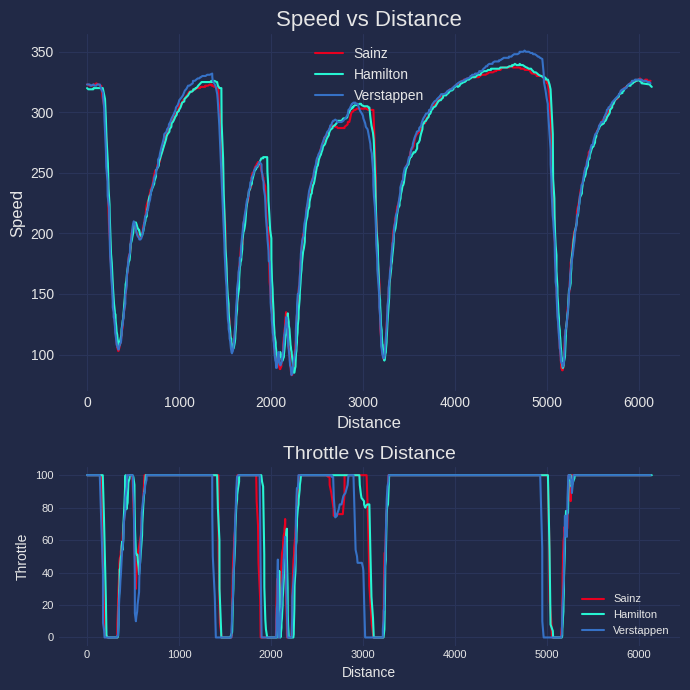

In [36]:
def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_race_sai.Distance,
    tele_race_sai.Speed,
    label="Sainz",
    color=get_driver_color("SAI"),
)
ax[0].plot(
    tele_race_ham.Distance,
    tele_race_ham.Speed,
    label="Hamilton",
    color=get_driver_color("HAM"),
)
ax[0].plot(
    tele_race_ver.Distance,
    tele_race_ver.Speed,
    label="Verstappen",
    color=get_driver_color("VER"),
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_race_sai.Distance,
    tele_race_sai.Throttle,
    label="Sainz",
    color=get_driver_color("SAI"),
)
ax[1].plot(
    tele_race_ham.Distance,
    tele_race_ham.Throttle,
    label="Hamilton",
    color=get_driver_color("HAM"),
)
ax[1].plot(
    tele_race_ver.Distance,
    tele_race_ver.Throttle,
    label="Verstappen",
    color=get_driver_color("VER"),
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [37]:
driver1_sectors = pd.DataFrame({
    'Driver': ['Sainz'] * len(sai_race_sec1),
    'Sector1Time': sai_race_sec1,
    'Sector2Time': sai_race_sec2,
    'Sector3Time': sai_race_sec3,
    'Lap Time' : sai_race_lap_time
})

driver2_sectors = pd.DataFrame({
    'Driver': ['Verstappen'] * len(ver_race_sec1),
    'Sector1Time': ver_race_sec1,
    'Sector2Time': ver_race_sec2,
    'Sector3Time': ver_race_sec3,
    'Lap Time' : ver_race_lap_time
})

driver3_sectors = pd.DataFrame({
    'Driver': ['Hamilton'] * len(ham_race_sec1),
    'Sector1Time': ham_race_sec1,
    'Sector2Time': ham_race_sec2,
    'Sector3Time': ham_race_sec3,
    'Lap Time' : ham_race_lap_time
})

all_drivers_sectors = pd.concat([driver1_sectors, driver2_sectors, driver3_sectors], ignore_index=True)
all_drivers_sectors['Sector1Time'] = all_drivers_sectors['Sector1Time'].apply(convert_to_normal)
all_drivers_sectors['Sector2Time'] = all_drivers_sectors['Sector2Time'].apply(convert_to_normal)
all_drivers_sectors['Sector3Time'] = all_drivers_sectors['Sector3Time'].apply(convert_to_normal)
all_drivers_sectors['Lap Time'] = all_drivers_sectors['Lap Time'].apply(convert_to_normal)
all_drivers_sectors.sort_values(by=["Sector1Time","Sector2Time","Sector3Time"],ascending=True).dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
143,Hamilton,00:27.175000,00:32.161000,00:36.326000,01:35.662000
144,Hamilton,00:27.189000,00:32.368000,00:36.431000,01:35.988000
139,Hamilton,00:27.203000,00:32.360000,00:36.365000,01:35.928000
138,Hamilton,00:27.222000,00:32.265000,00:36.393000,01:35.880000
140,Hamilton,00:27.224000,00:32.010000,00:36.246000,01:35.480000
...,...,...,...,...,...
127,Hamilton,00:43.972000,00:32.501000,00:36.429000,01:52.902000
61,Verstappen,00:44.055000,00:34.040000,00:36.923000,01:55.018000
113,Hamilton,00:44.152000,00:34.331000,00:36.445000,01:54.928000
10,Sainz,00:44.285000,00:33.688000,00:36.686000,01:54.659000


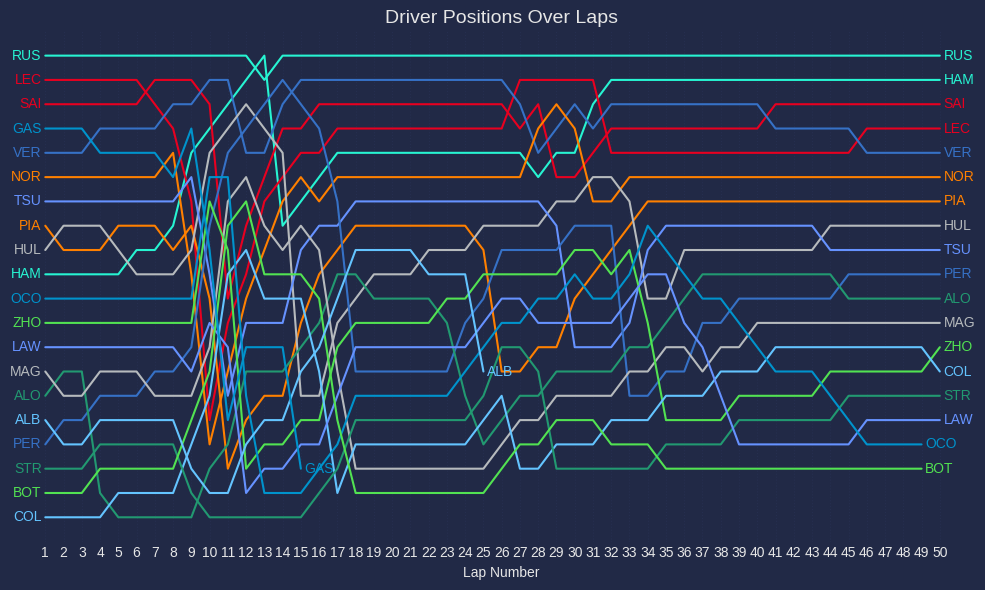

In [38]:
# Get unique drivers and total number of laps
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

# Initialize an empty dictionary to store team colors
team_colors = {}

# Fetch the team color for each driver dynamically and convert to RGB
for driver in drivers_ab:
    driver_object = quali.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

# Plot each driver's positions with their team color
plt.figure(figsize=(10, 6))  # Adjust figure size
for driver in drivers_ab:
    positions = laps[laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))  # Default to gray if no color is specified
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    # Annotate driver name at the start of the line
    plt.text(
        1 - 0.2,  # Slightly to the left of the first lap
        positions[0],  # Y-coordinate of the first position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='right'  # Align text to the right of the point
    )
    
    # Annotate driver name at the end of the line
    plt.text(
        len(positions) + 0.2,  # Slightly to the right of the last lap
        positions[-1],  # Y-coordinate of the last position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='left'  # Align text to the left of the point
    )

# Add plot title and labels
plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)  # Extend x-axis to leave space for annotations
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()  # Invert y-axis so positions are ranked correctly
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

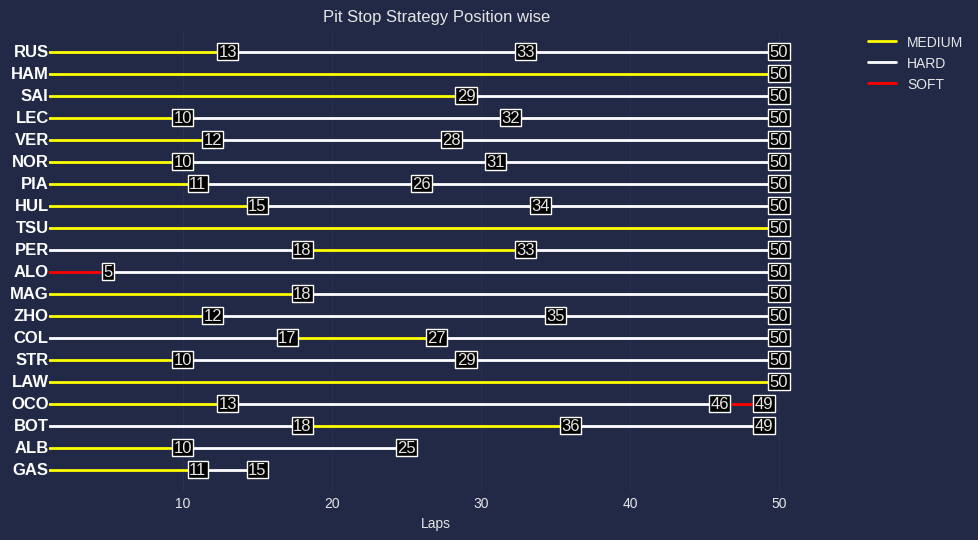

In [39]:
def getDriverPosition(abbreviation: str):
    res = race.results
    c = res["Abbreviation"] == abbreviation
    pos = res.loc[c, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "unknown")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()


In [40]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)
    

/tmp/ipykernel_84498/2770152713.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
19,GAS,319.0
15,LAW,321.0
17,BOT,323.0
4,VER,325.0
12,ZHO,325.0
14,STR,326.0
0,RUS,327.0
6,PIA,329.0
8,TSU,330.0
10,ALO,330.0


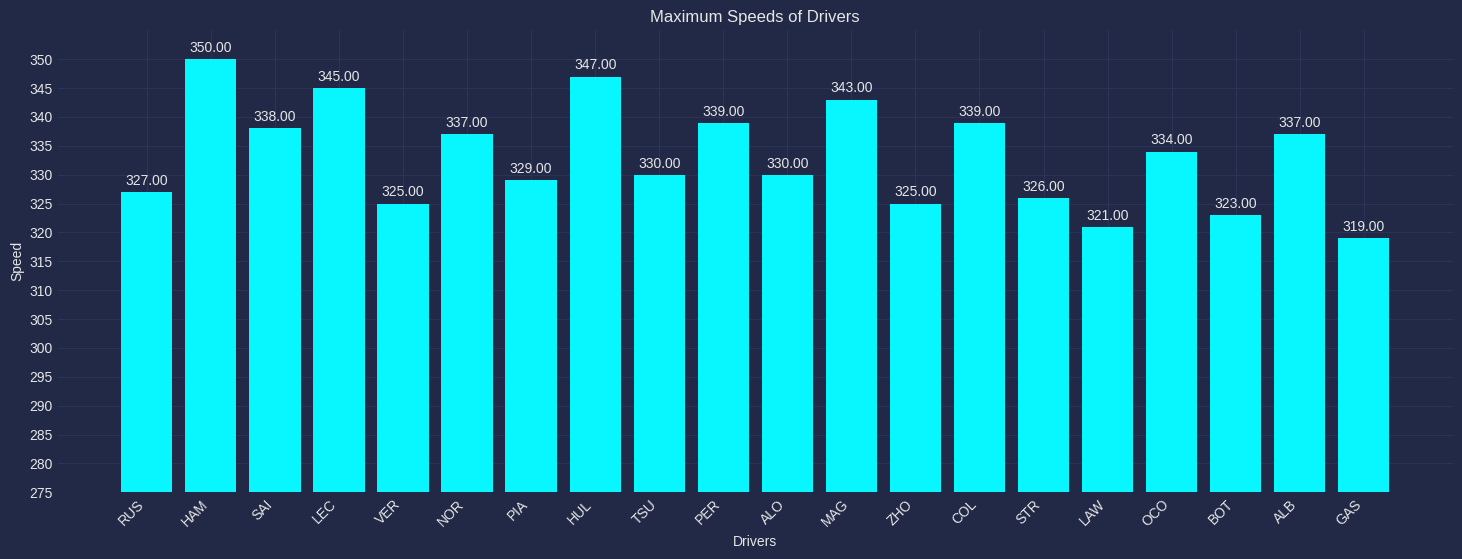

In [41]:
fig,ax = plt.subplots(figsize=(18, 6))


bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])

ax.set_xlabel('Drivers')

ax.set_ylabel('Speed')

ax.set_title('Maximum Speeds of Drivers')

plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Display the plot
plt.show()

In [42]:
plotting.setup_mpl()

In [48]:
laps_ham = laps.pick_driver("HAM")
laps_ver = laps.pick_driver("VER")

fastest_ham = laps_ham.pick_fastest().get_telemetry().add_distance()
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()

fastest_ham["Driver"] = "HAM"
fastest_ver["Driver"] = "VER"
telemetry = pd.concat([fastest_ham,fastest_ver])

In [49]:
num_minisectors = 25

total_distance = total_distance = max(telemetry['Distance'])

minisector_length = total_distance / num_minisectors

In [50]:
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [51]:

telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [52]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,HAM,299.625000
1,1,VER,298.541667
2,2,HAM,144.740000
3,2,VER,136.191489
4,3,HAM,213.571429
5,3,VER,213.212121
6,4,HAM,279.500000
7,4,VER,279.571429
8,5,HAM,314.090909
9,5,VER,319.789474


In [53]:
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [54]:

# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'HAM', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 2

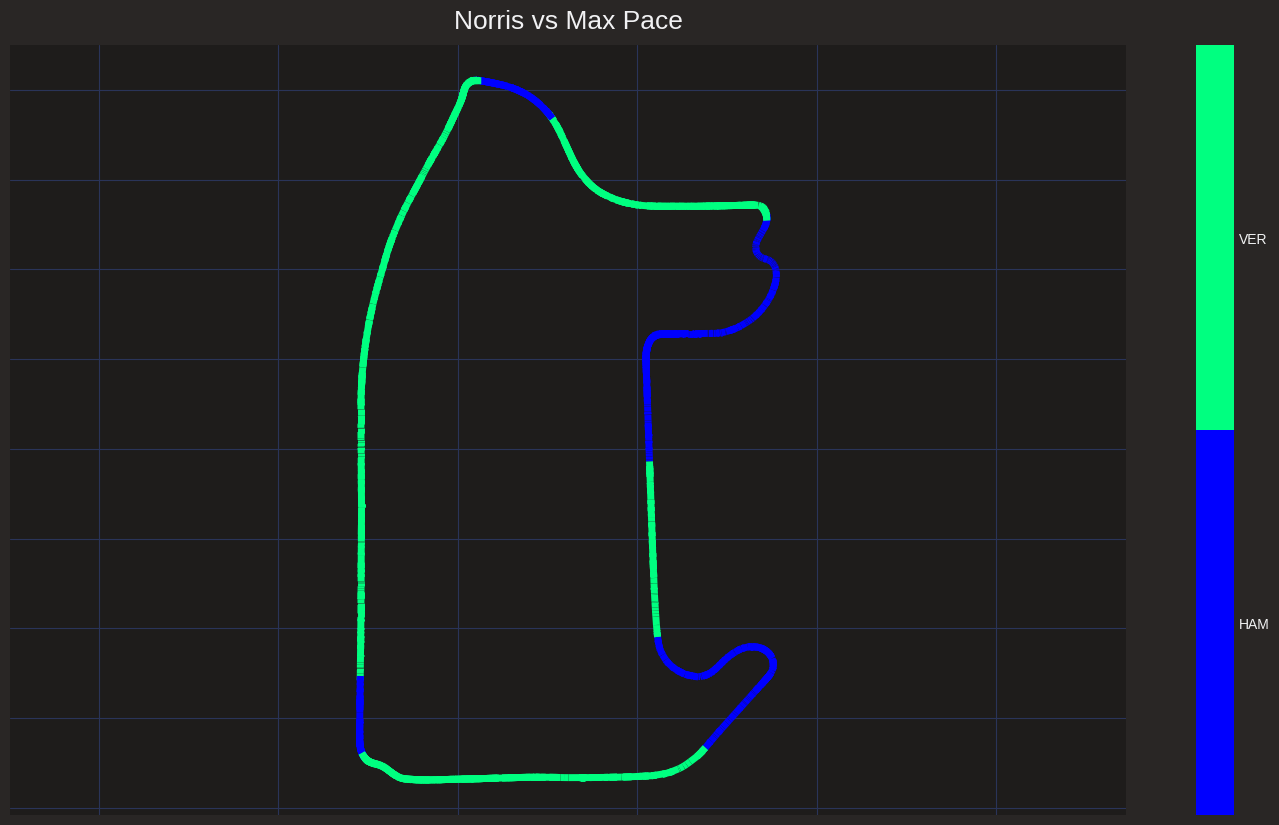

In [56]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Adjust the colorbar settings
cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['HAM', 'VER'])
plt.title("Norris vs Max Pace")
plt.show()
